In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from lang_efficient_sam.LangEfficientSAM import LangEfficientSAM
from lang_efficient_sam.utils.draw_image import draw_image

In [2]:
image_path = './images/fruits.jpg'
image = Image.open(image_path).convert("RGB")
image2 = cv2.imread(image_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [3]:
model = LangEfficientSAM()

Device: cuda


/home/alpaflow/.local/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/alpaflow/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [4]:
masks, boxes, phrases, logits = model.predict(image, "apple")

/home/alpaflow/.local/lib/python3.12/site-packages/transformers/modeling_utils.py:993: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/alpaflow/.local/lib/python3.12/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/alpaflow/.local/lib/python3.12/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


DINO:  1.038886308670044
SAM:  0.6460089683532715
SAM:  0.5850098133087158
SAM:  0.726689338684082
SAM:  0.42745423316955566
SAM:  0.42585110664367676


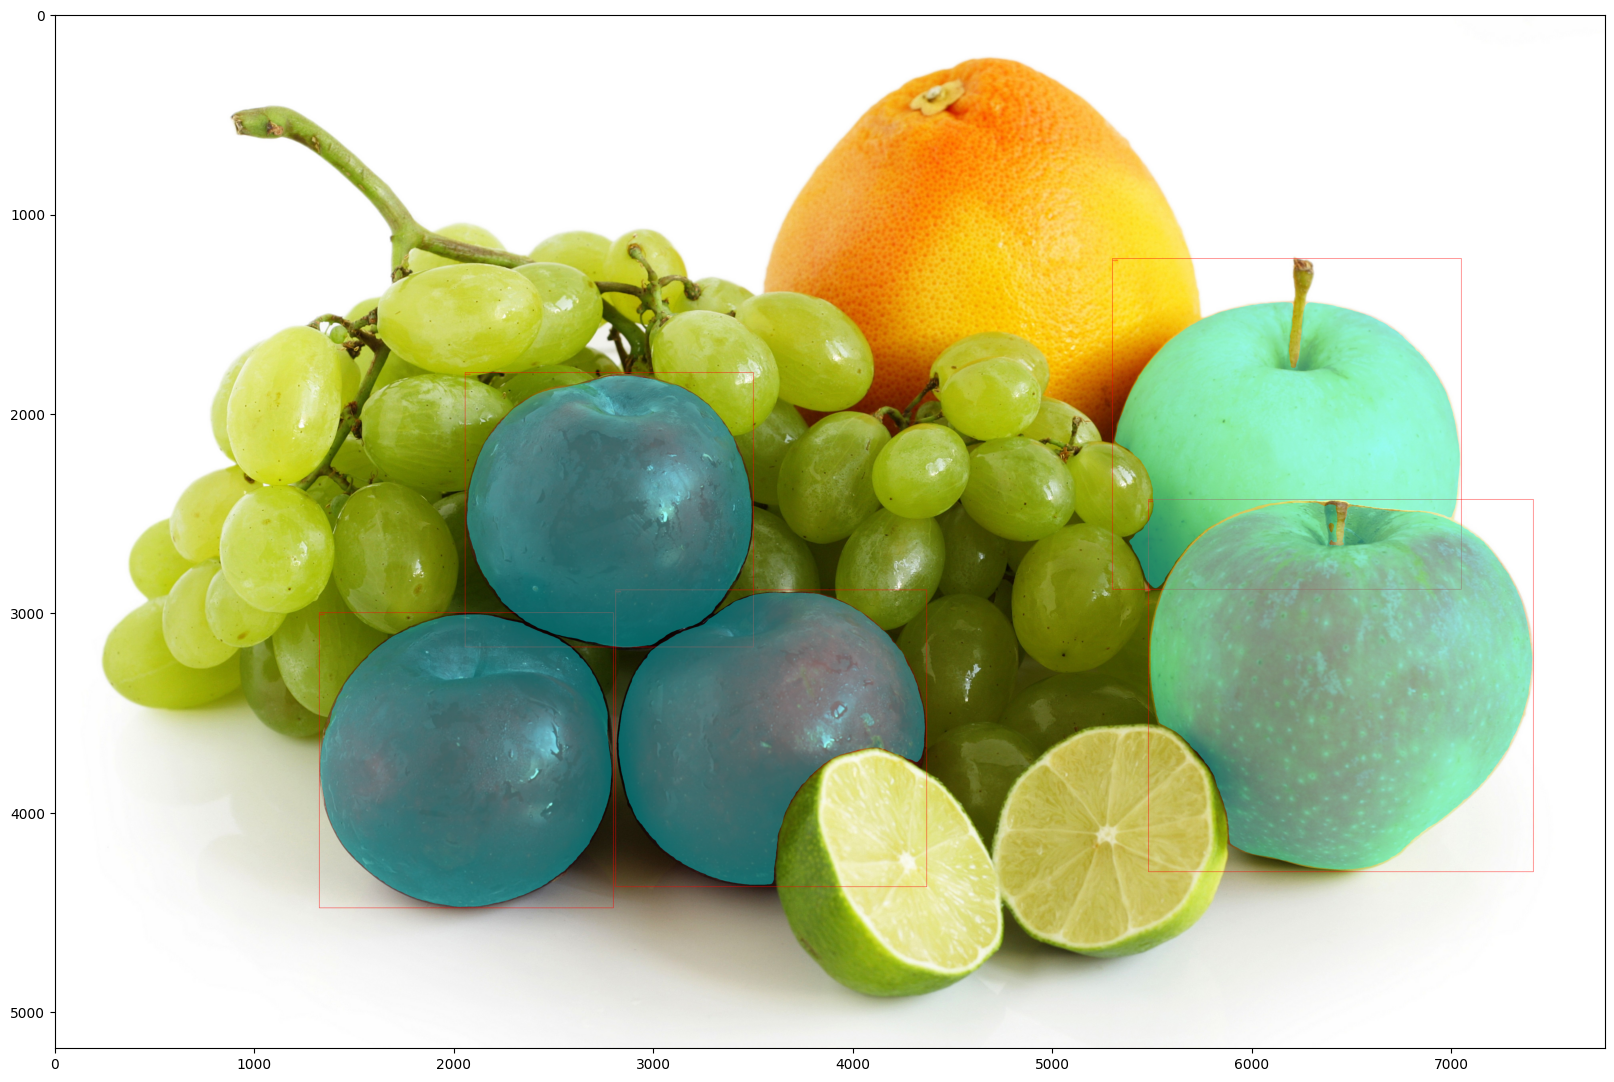

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(draw_image(image2, masks, boxes, phrases, alpha=0.4))
plt.show()